<a href="https://colab.research.google.com/github/dclark18/MSDS_Capstone/blob/master/Capstone_A_EDA_Clark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

In [2]:
female_drive = 'https://drive.google.com/file/d/17fVhjvXH-ckfQM1kY_4CrQH2UDlszY-L/view?usp=sharing'

file_id = female_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
female_clean = pd.read_csv(csv_raw)
female_clean.head()
female_clean = female_clean.iloc[0:22990]
female_clean.tail()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  Bear_ID  SAMPLEID   TURNANGLE   STEPLENGTH  \
22985     22986.0  4681.0  0.0    375.0    4681.0  -56.424118   234.498194   
22986     22987.0  4682.0  0.0    375.0    4682.0  179.173599   515.164005   
22987     22988.0  4683.0  0.0    375.0    4683.0  -14.217464  3473.900916   
22988     22989.0  4684.0  0.0    375.0    4684.0  106.585696   440.587103   
22989     22990.0  4685.0  0.0    375.0    4685.0  148.551590   240.630812   

          BEARING  OBSERVED        datetime  ...  naturalMAX naturalBEG  \
22985  318.328368       0.0  8/30/2012 0:00  ...         1.0        1.0   
22986  193.926086       0.0  8/30/2012 0:00  ...         1.0        1.0   
22987    0.535023       0.0  8/30/2012 0:00  ...         1.0        1.0   
22988  121.338182       0.0  8/30/2012 0:00  ...         1.0        1.0   
22989  163.304076       0.0  8/30/2012 0:00  ...         1.0        1.0   

       naturalEND   NatnegLWM  NatnegMIN   NatnegMAX  NatnegBEG   NatnegEND  \
22985         1.0   46.071839 -30.000000   84.852814      -30.0  -30.000000   
22986         0.0  -31.332584 -67.082039   42.426407      -30.0   42.426407   
22987         0.0  236.653002 -90.000000  600.000000      -30.0  600.000000   
22988         0.0  128.143142 -42.426407  212.132034      -30.0  189.736664   
22989         0.0    4.970611 -30.000000   90.000000      -30.0   90.000000   

       STRATUM     resid  
22985   2090.0 -0.640189  
22986   2090.0 -0.444709  
22987   2090.0 -0.017580  
22988   2090.0 -0.114555  
22989   2090.0 -0.290843  

[5 rows x 69 columns]

In [3]:
male_drive = 'https://drive.google.com/file/d/1lzz2ykpEs8HNPLGUay3S5xI8MVnLVNXY/view?usp=sharing'

file_id = male_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
male_clean = pd.read_csv(csv_raw)
male_clean = male_clean.iloc[0:167057]
male_clean.head()
male_clean.tail()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  Bear_ID  SAMPLEID   TURNANGLE   STEPLENGTH  \
167052    167053.0  6771.0  0.0    831.0    6771.0  -77.339746   457.878450   
167053    167054.0  6772.0  0.0    831.0    6772.0   33.112707  1513.832435   
167054    167055.0  6773.0  0.0    831.0    6773.0  -37.634686   496.507613   
167055    167056.0  6774.0  0.0    831.0    6774.0  -18.001250   341.453471   
167056    167057.0  6775.0  0.0    831.0    6775.0 -144.759947   588.596818   

           BEARING  OBSERVED  datetime  ...  naturalMAX naturalBEG  \
167052  166.201538       0.0   41151.5  ...         1.0        1.0   
167053  276.653991       0.0   41151.5  ...         1.0        1.0   
167054  205.906598       0.0   41151.5  ...         1.0        1.0   
167055  225.540034       0.0   41151.5  ...         1.0        1.0   
167056   98.781337       0.0   41151.5  ...         1.0        1.0   

        naturalEND   NatnegLWM  NatnegMIN   NatnegMAX  NatnegBEG   NatnegEND  \
167052         0.0  124.493927 -42.426407  212.132034 -42.426407  150.000000   
167053         0.0   -6.867719 -84.852814   67.082039 -42.426407   42.426407   
167054         0.0  132.056153 -42.426407  305.941162 -42.426407  276.586334   
167055         0.0   29.996062 -60.000000  174.928558 -42.426407  174.928558   
167056         0.0   -9.358880 -60.000000   42.426407 -42.426407   30.000000   

        STRATUM     resid  
167052  15187.0 -0.312966  
167053  15187.0 -0.483855  
167054  15187.0 -0.208582  
167055  15187.0 -0.291362  
167056  15187.0 -0.489409  

[5 rows x 69 columns]

## Data

In [4]:
print('Female Records and fields', female_clean.shape)
print('Male Records and fields', male_clean.shape)

print("Total Missing Values - Female", female_clean.isnull().sum().sum())
print('Total Missing Values - Male', male_clean.isnull().sum().sum())

Female Records and fields (22990, 69)
Male Records and fields (167057, 69)
Total Missing Values - Female 0
Total Missing Values - Male 0


## EDA

#### Response Variable

Text(0,0.5,'Count')

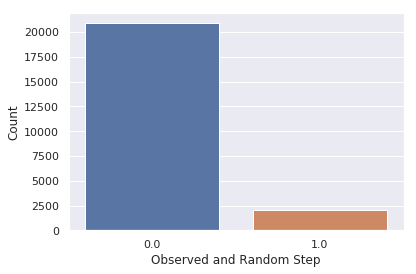

In [5]:
ax = sns.countplot(x = 'OBSERVED', data = female_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Text(0,0.5,'Count')

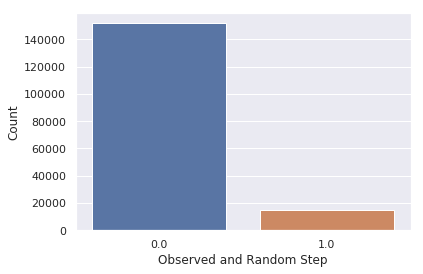

In [6]:
ax = sns.countplot(x = 'OBSERVED', data = male_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Looking at the female vs male data and the observed value vs random state value, we are seeing that for every observed value, we will get 10 random values to test against. 

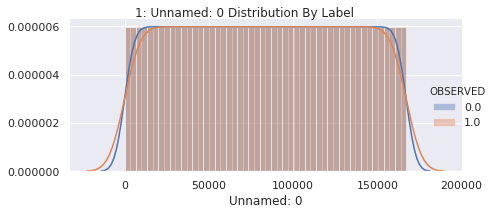

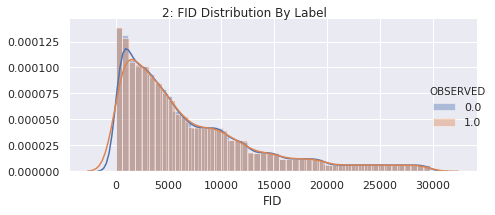

/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


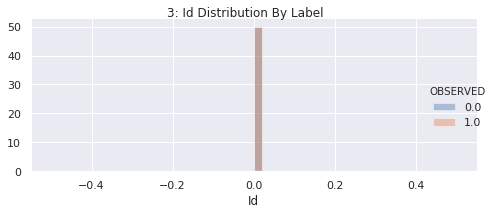

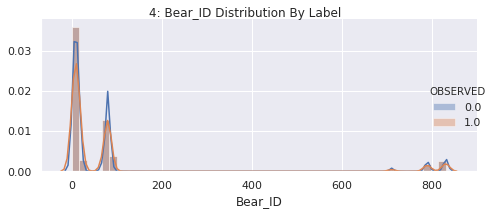

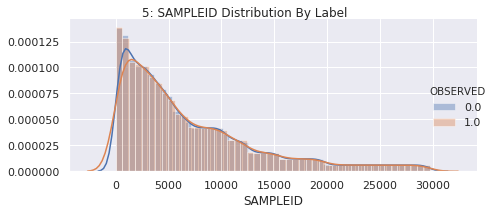

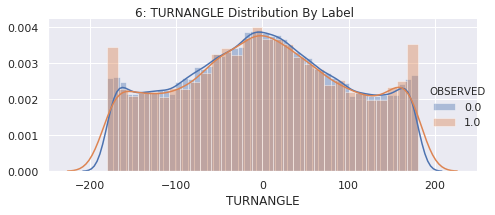

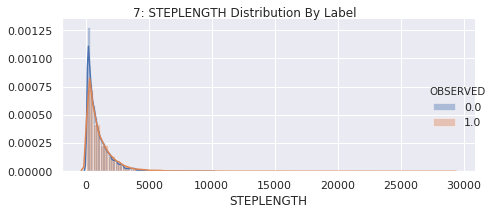

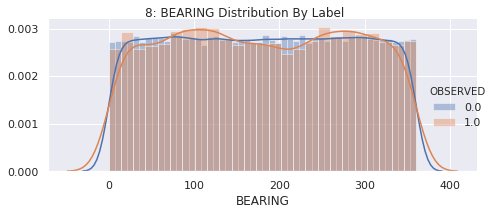

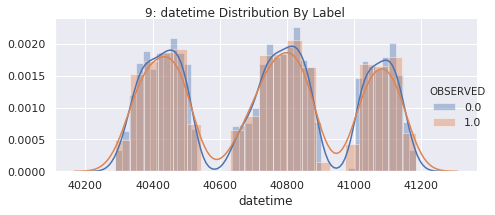

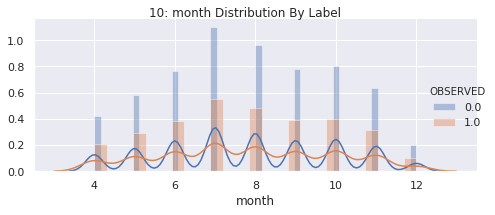

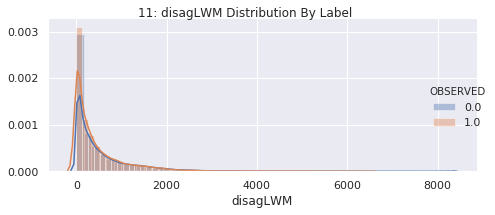

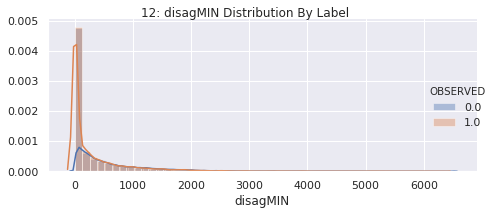

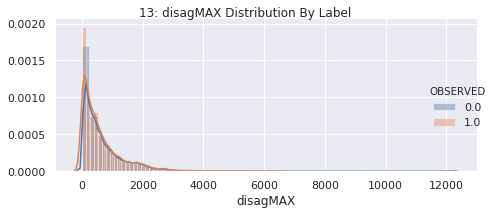

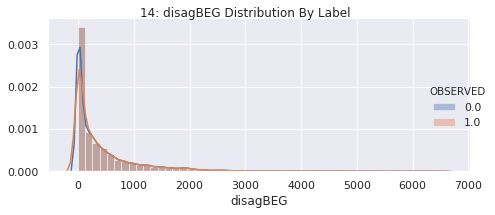

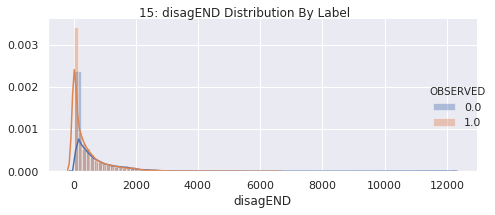

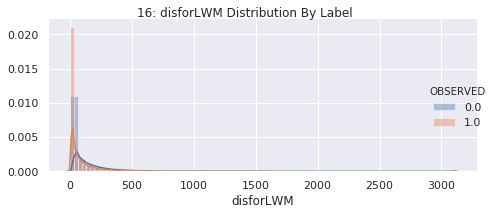

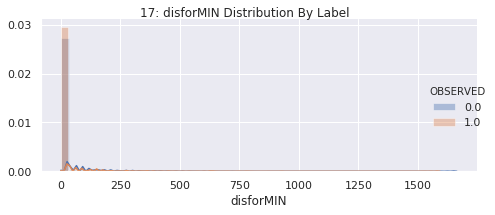

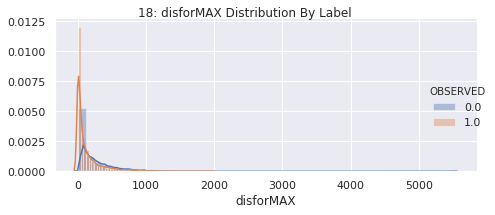

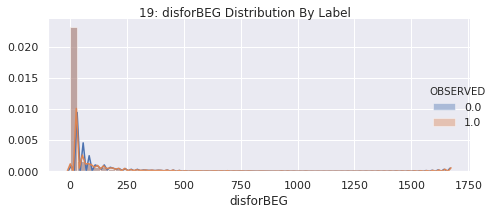

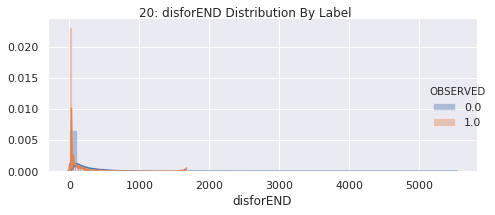

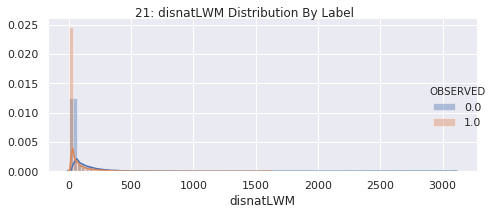

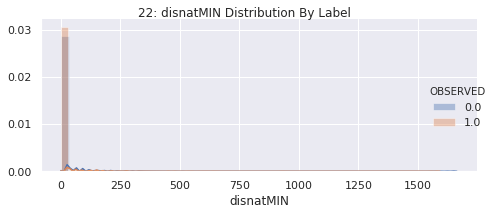

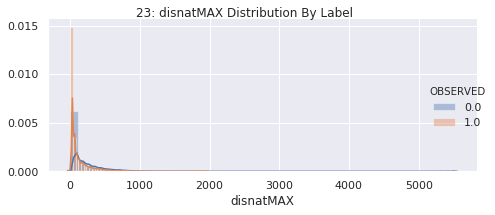

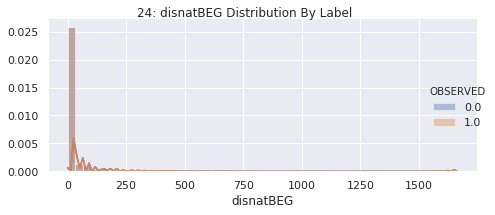

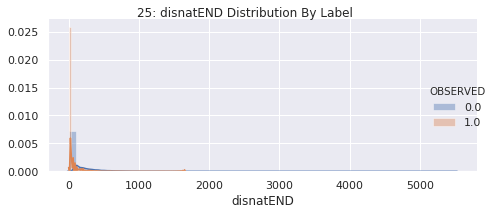

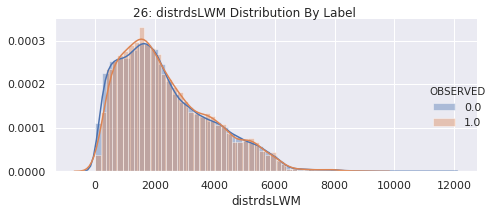

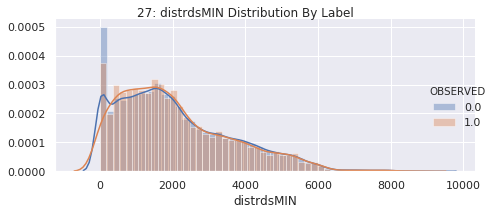

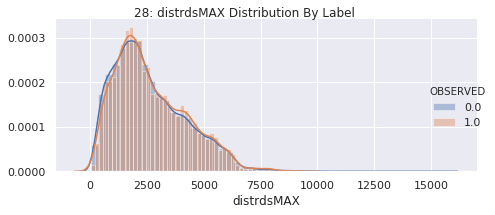

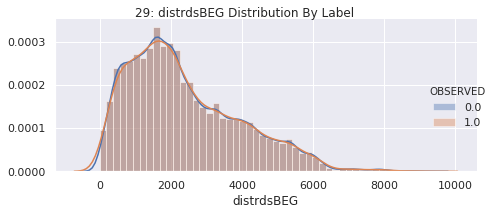

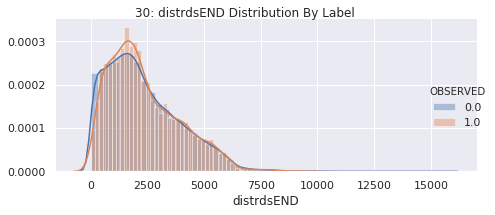

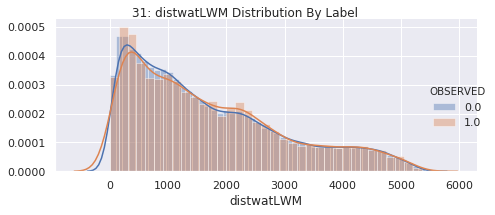

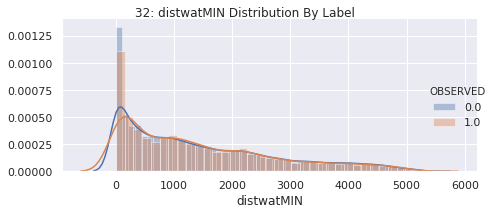

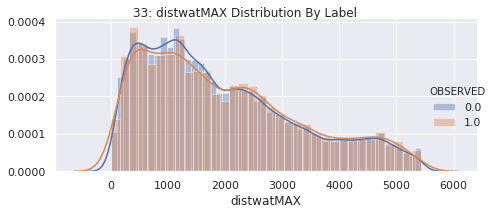

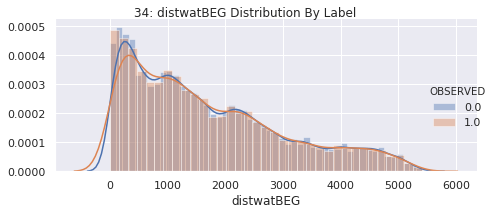

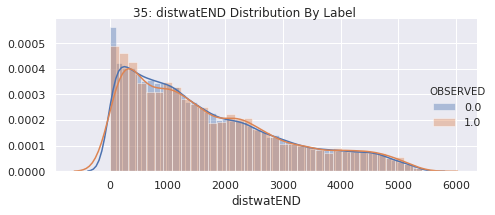

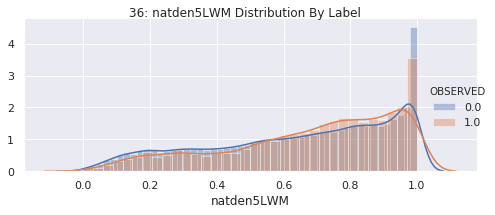

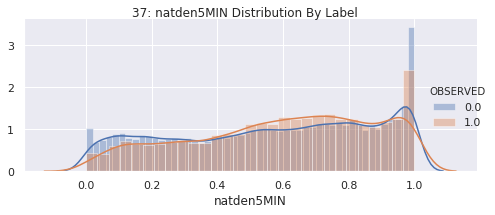

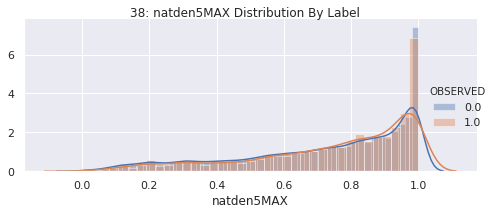

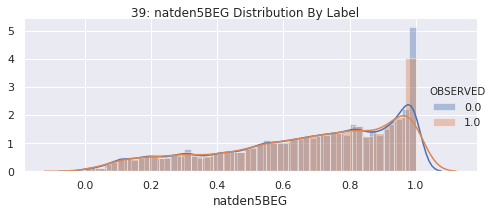

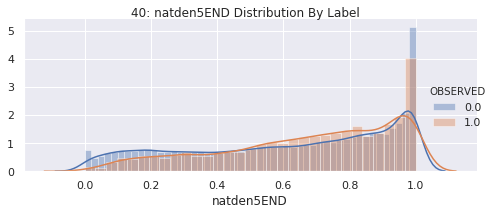

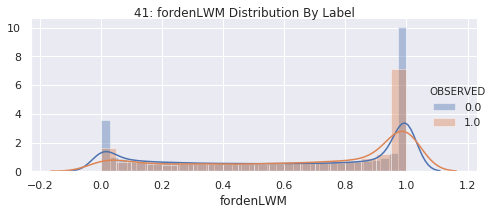

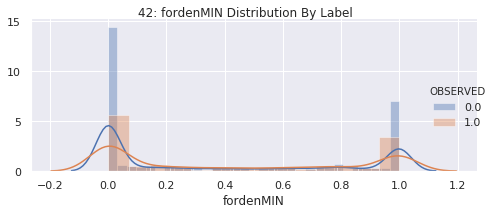

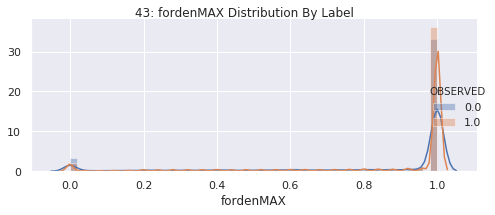

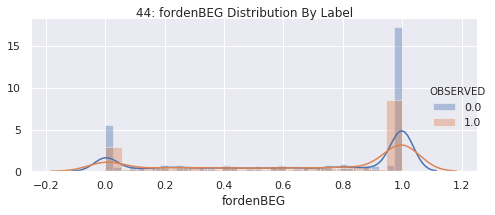

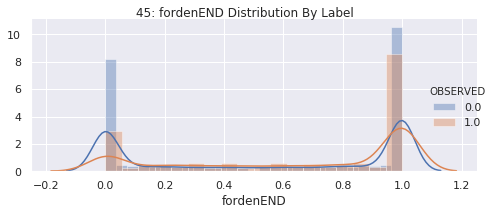

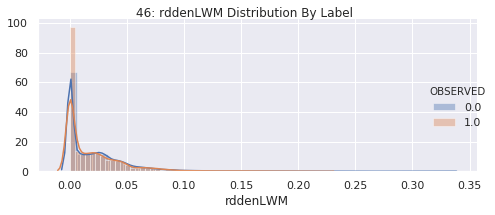

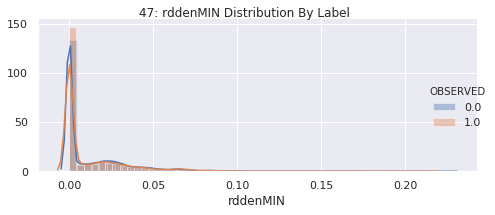

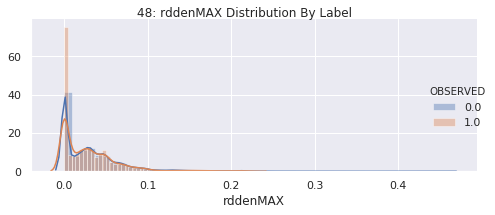

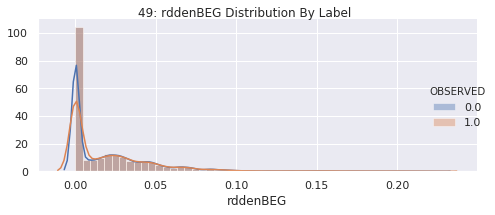

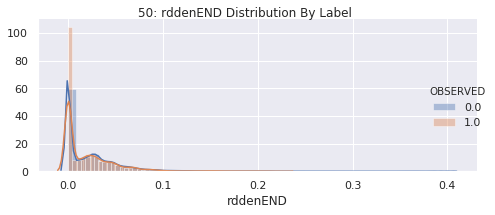

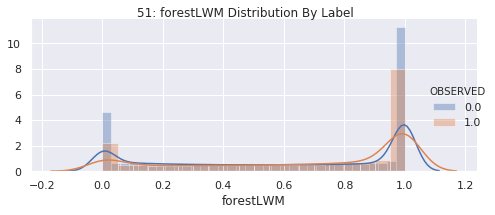

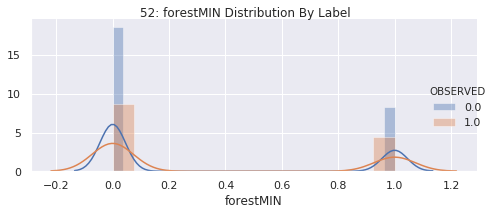

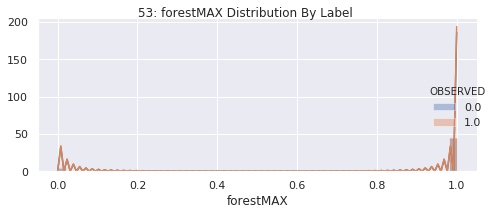

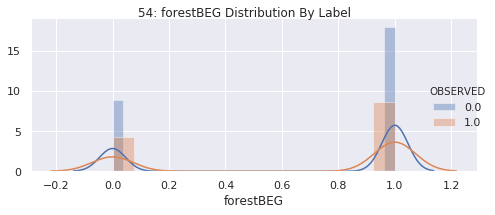

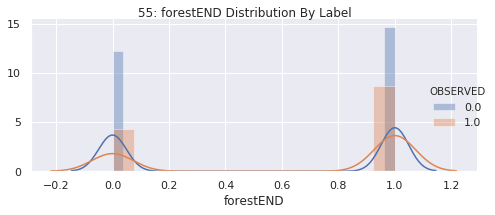

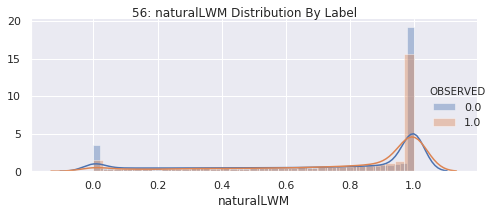

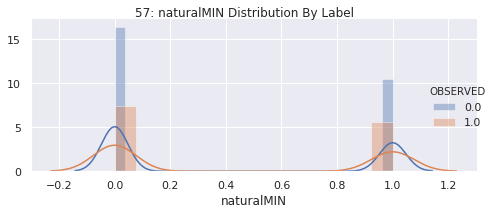

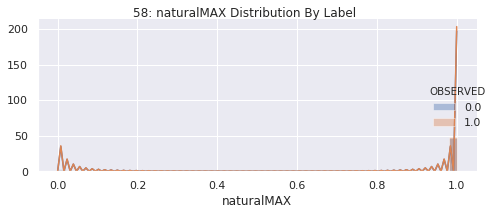

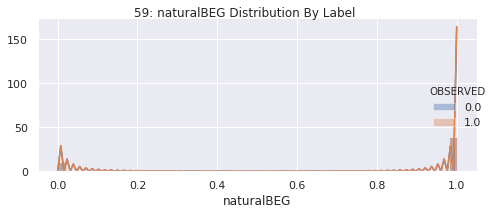

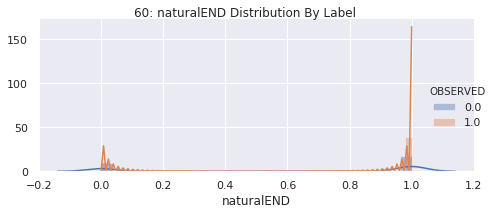

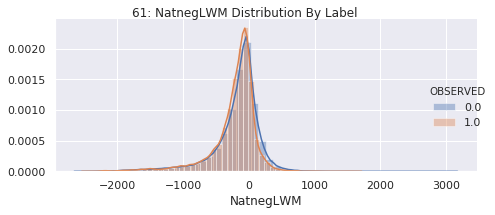

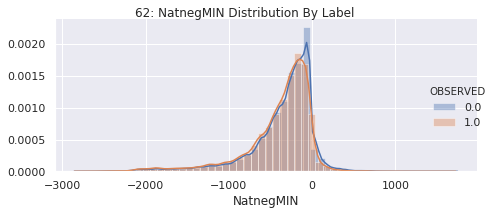

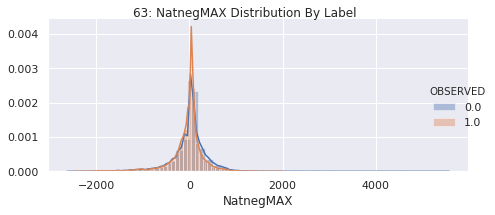

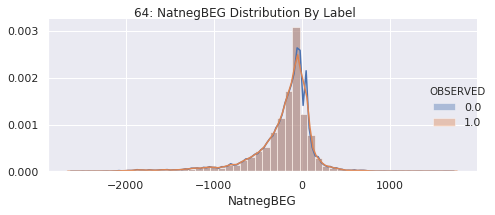

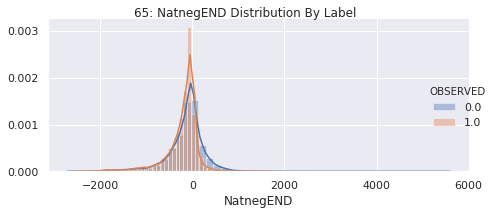

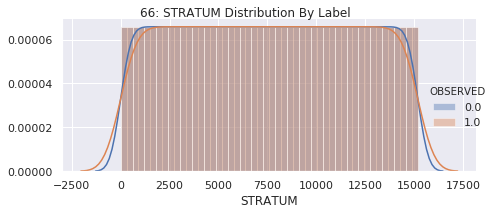

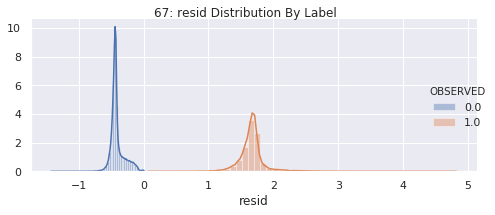

In [7]:

plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(male_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(male_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

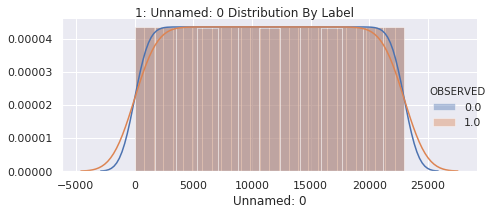

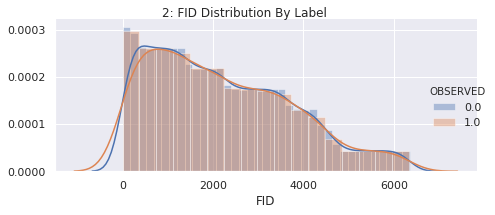

/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc/applications/anaconda/3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


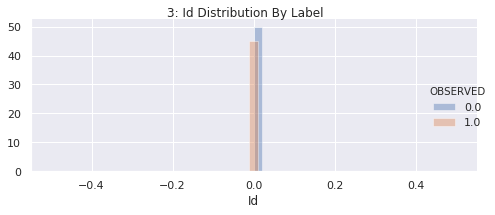

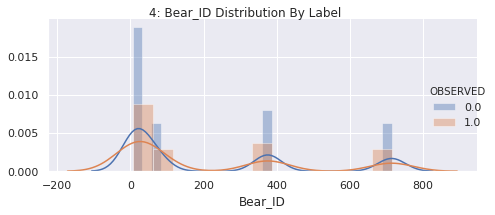

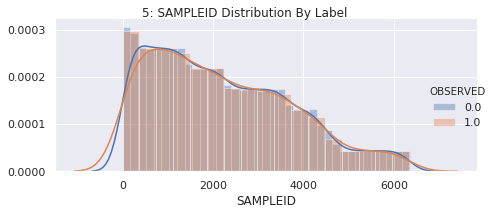

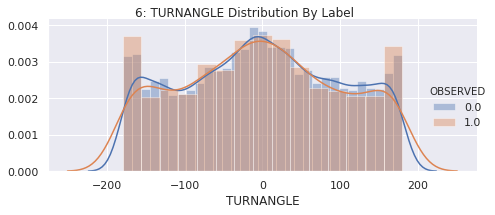

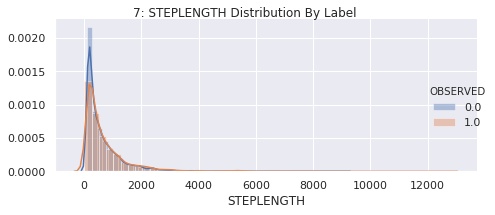

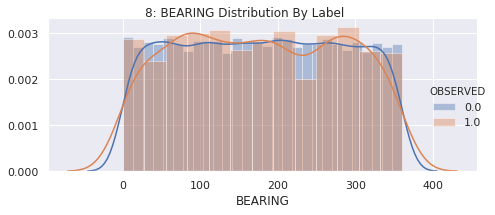

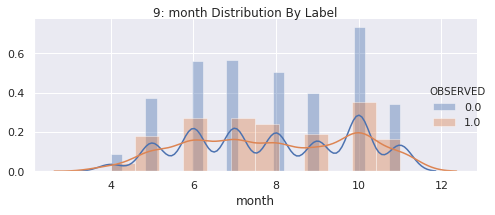

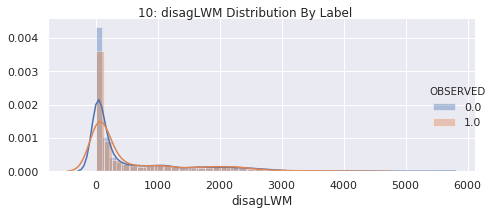

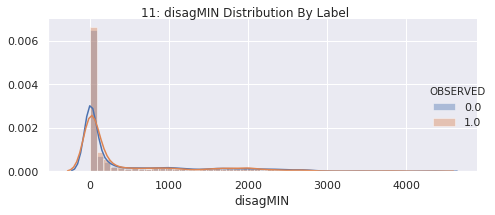

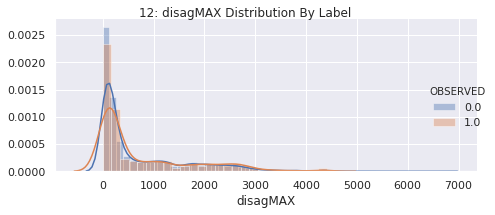

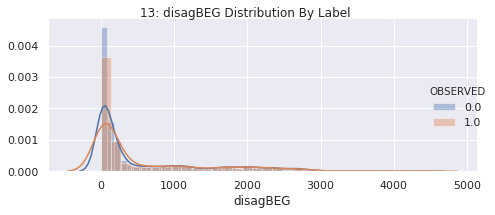

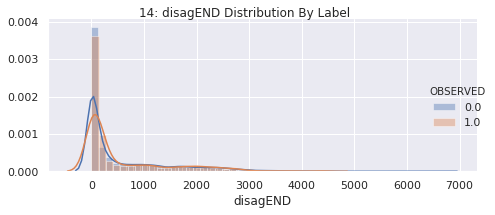

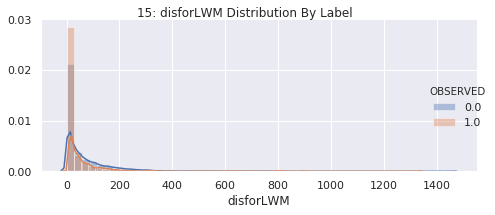

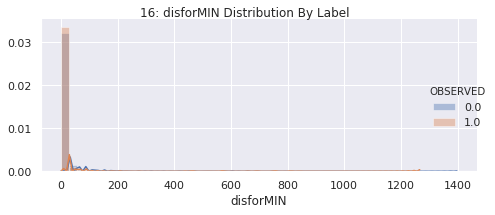

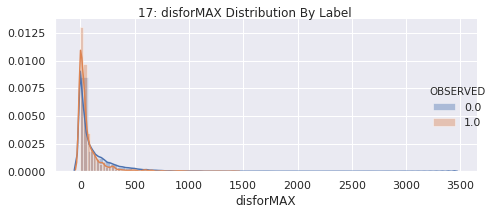

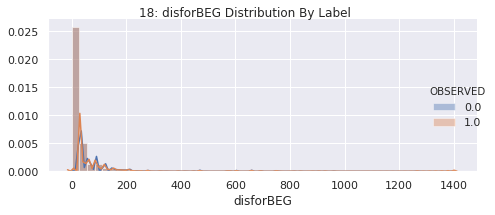

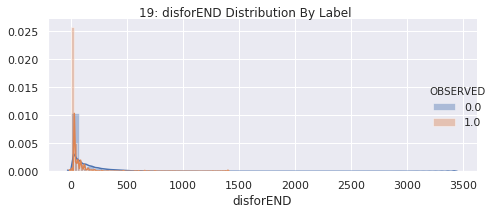

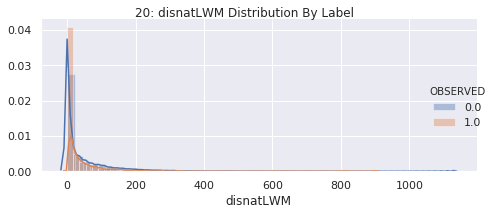

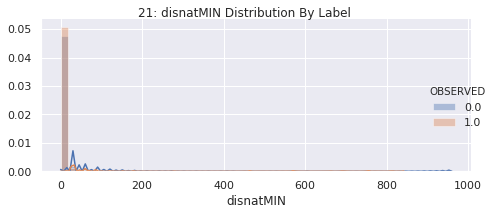

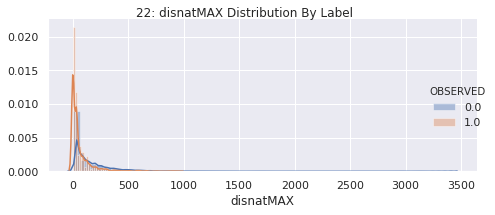

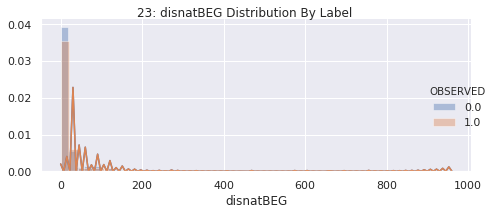

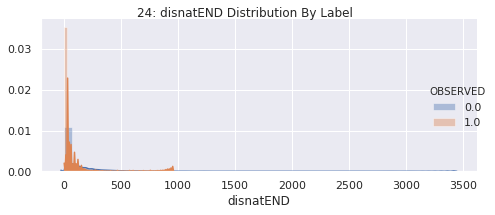

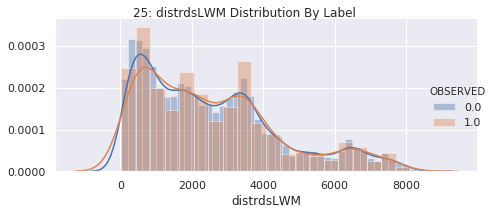

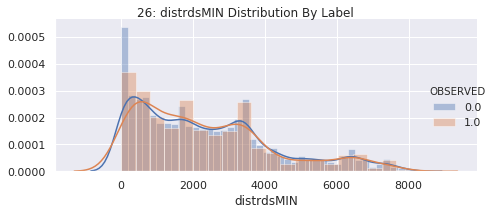

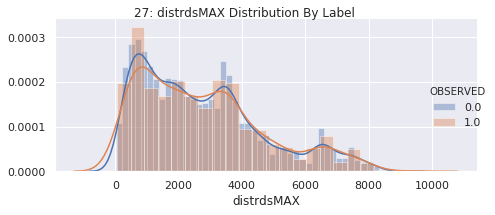

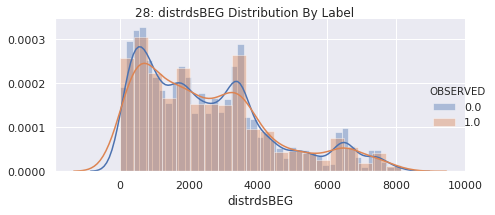

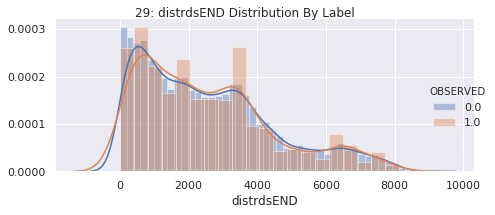

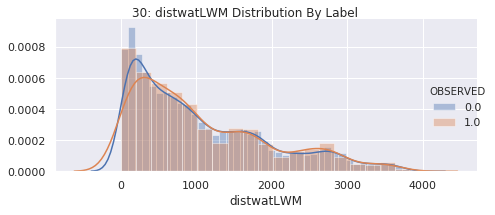

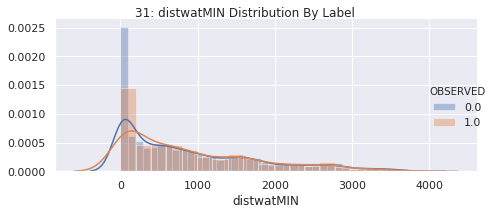

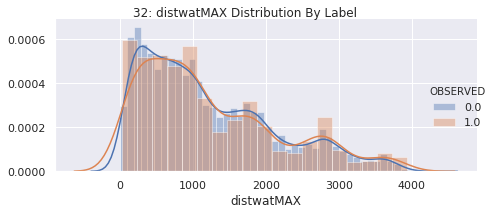

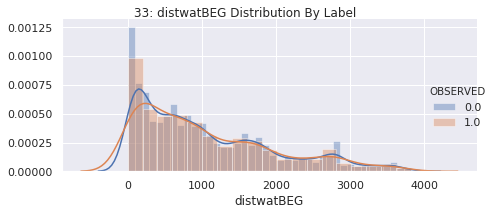

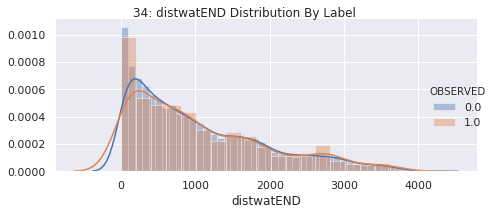

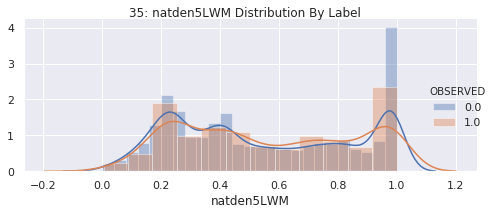

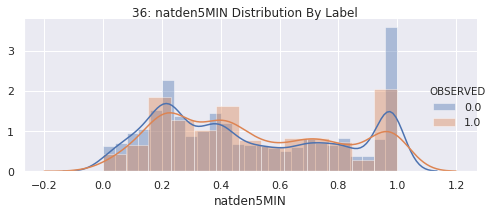

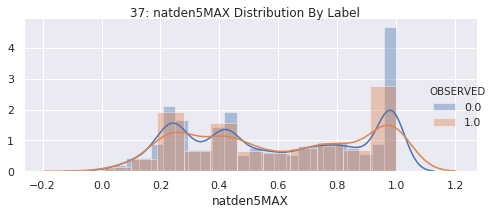

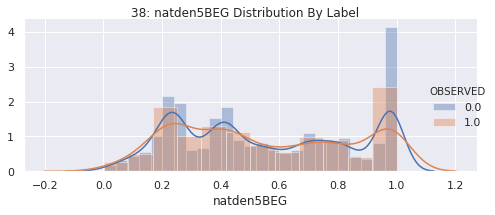

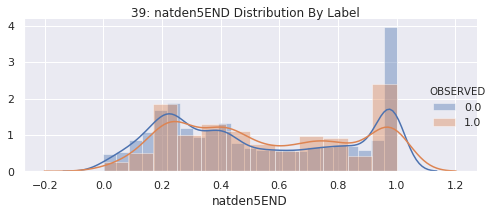

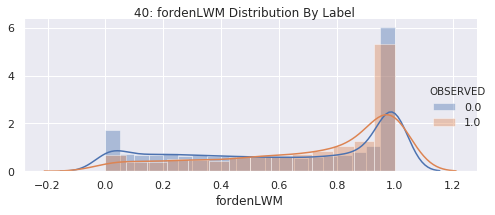

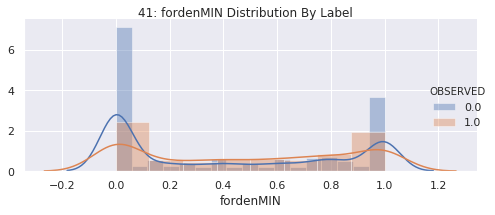

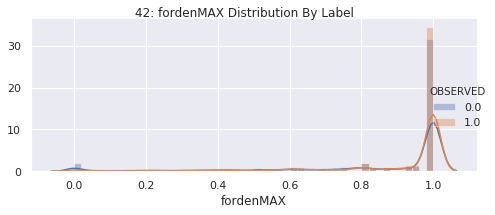

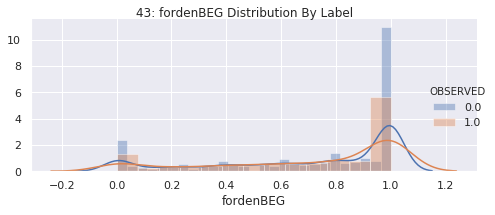

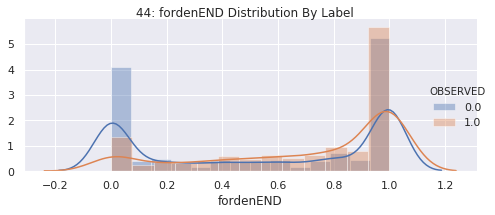

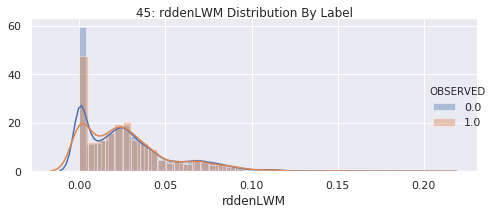

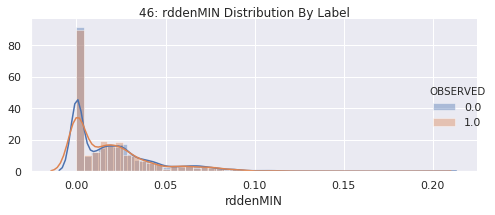

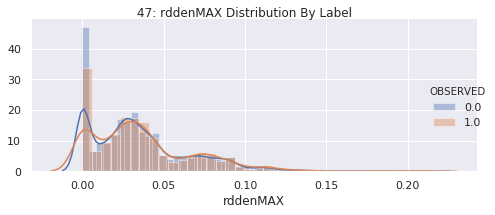

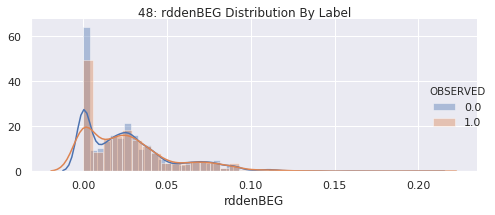

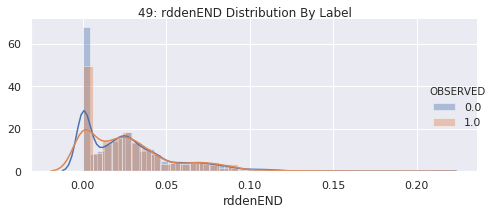

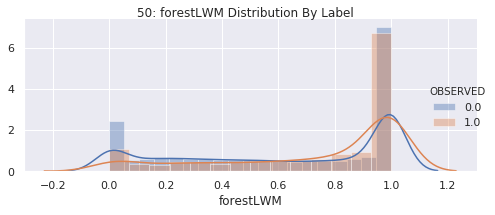

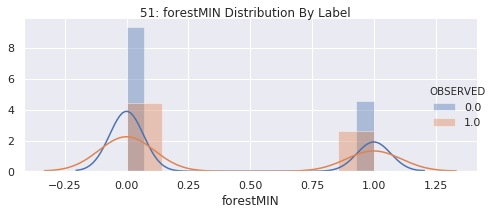

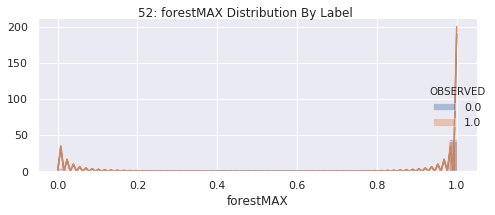

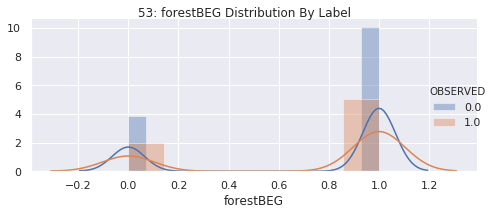

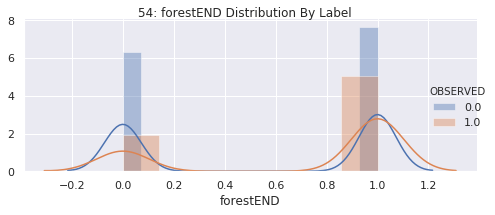

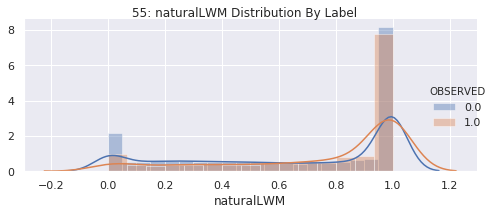

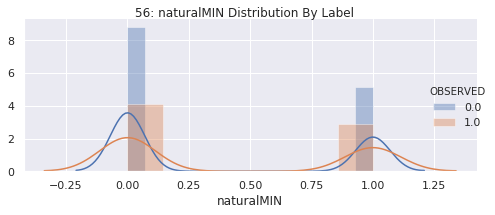

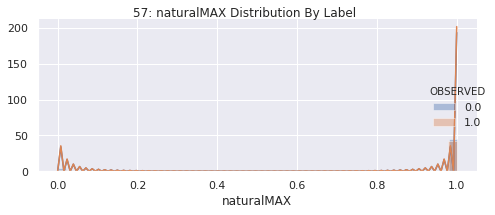

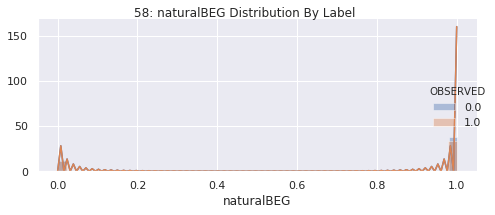

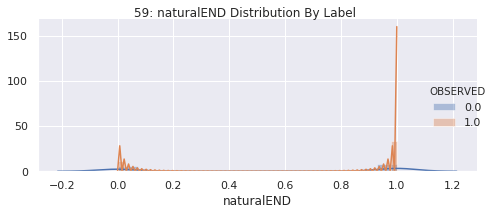

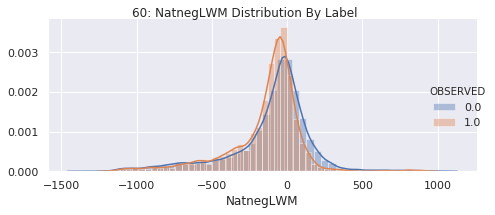

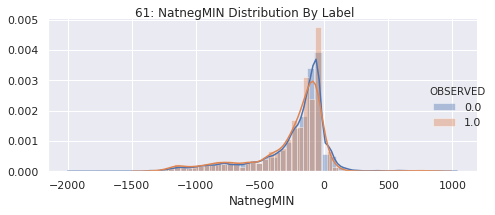

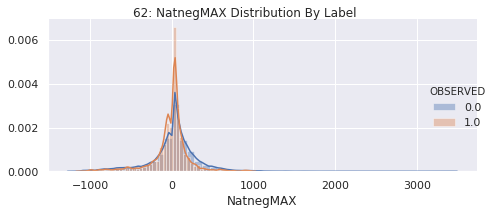

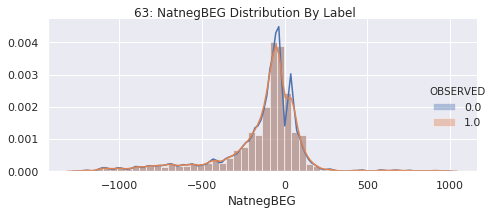

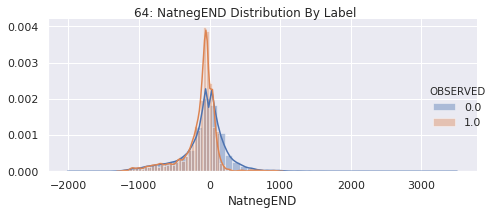

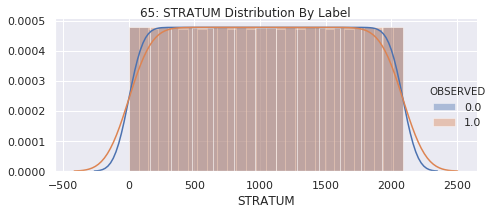

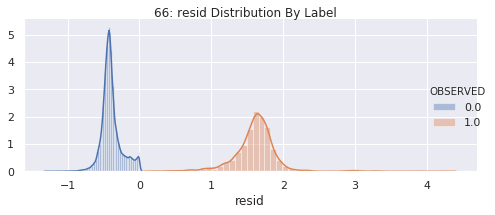

In [8]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(female_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(female_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

Looking at both male and female data and the distribution of continuous values, we can see that generally there are no glaring differences between the distribution of observed values vs random values outside of the residual data. So for our model, we wouuld likely want to remove residual as it might be overly indicative of performance. 

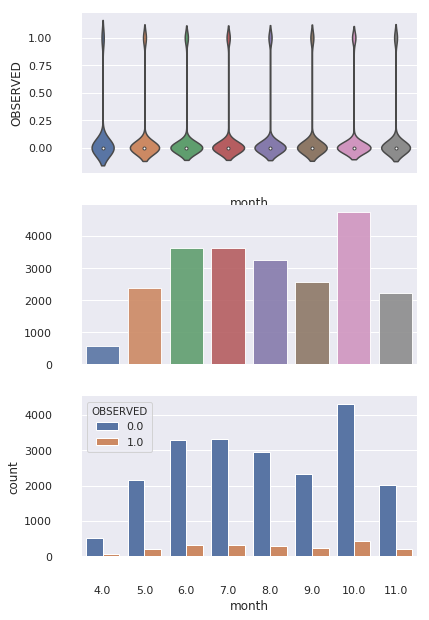

In [9]:
count = female_clean['month'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x="month", y="OBSERVED", data=female_clean, ax=axes[0])
sns.countplot(x = 'month', data = female_clean, hue = 'OBSERVED', ax=axes[2])
sns.despine(offset=20, trim=True)

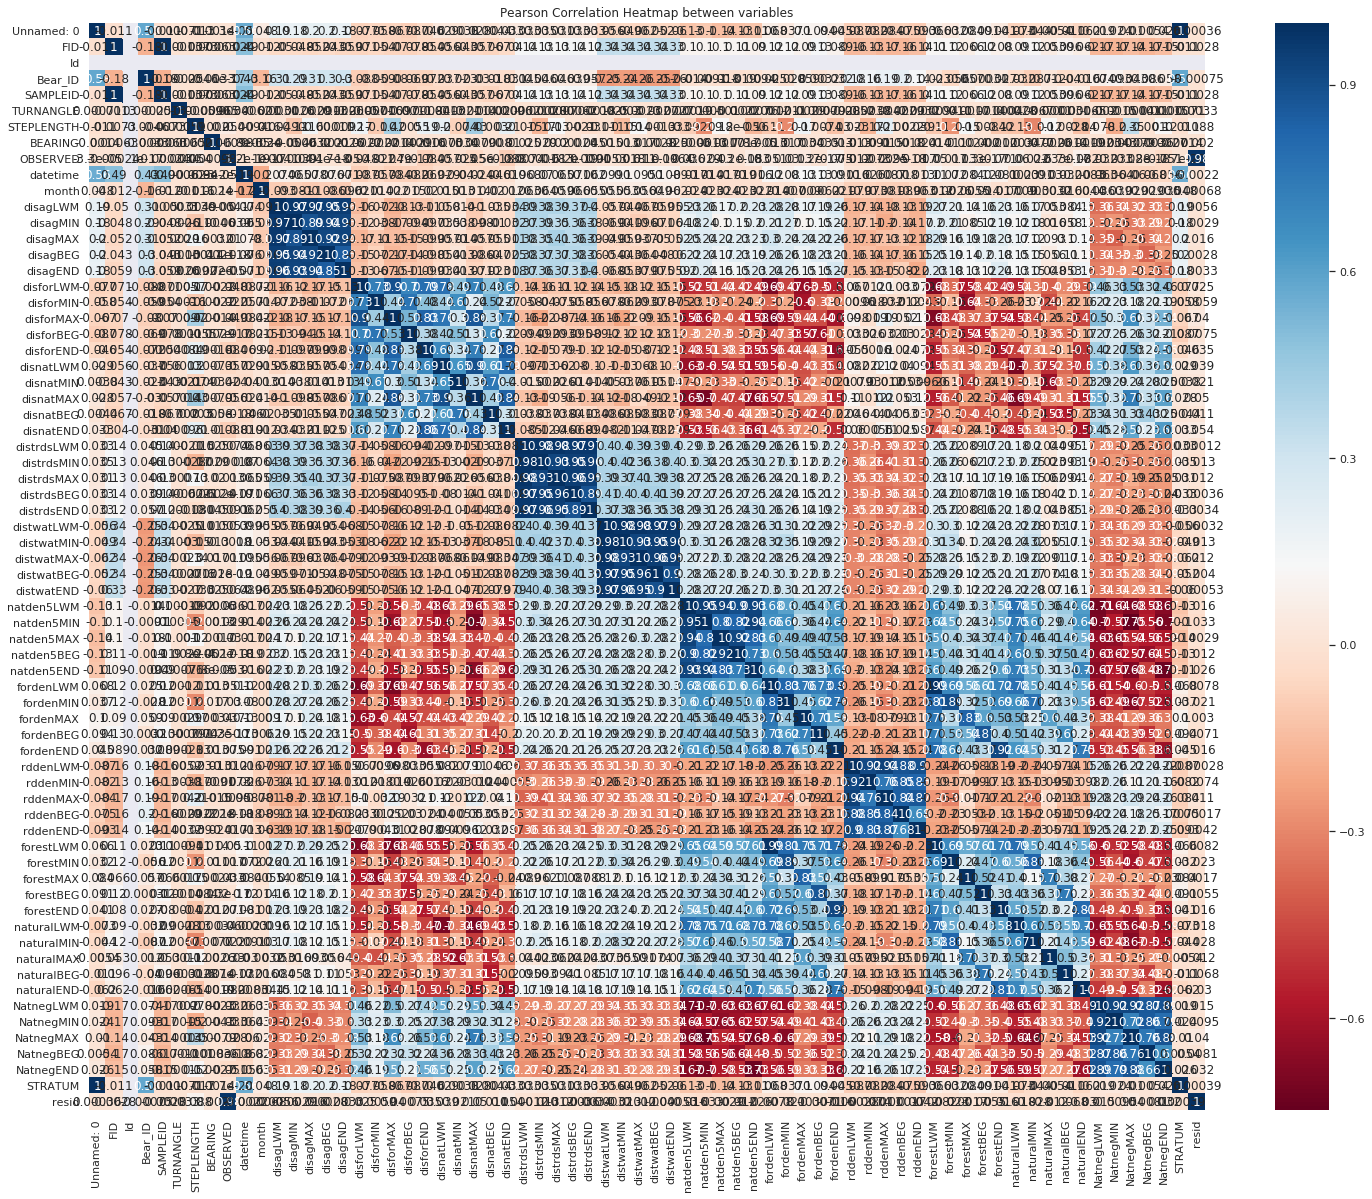

In [10]:
ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(male_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

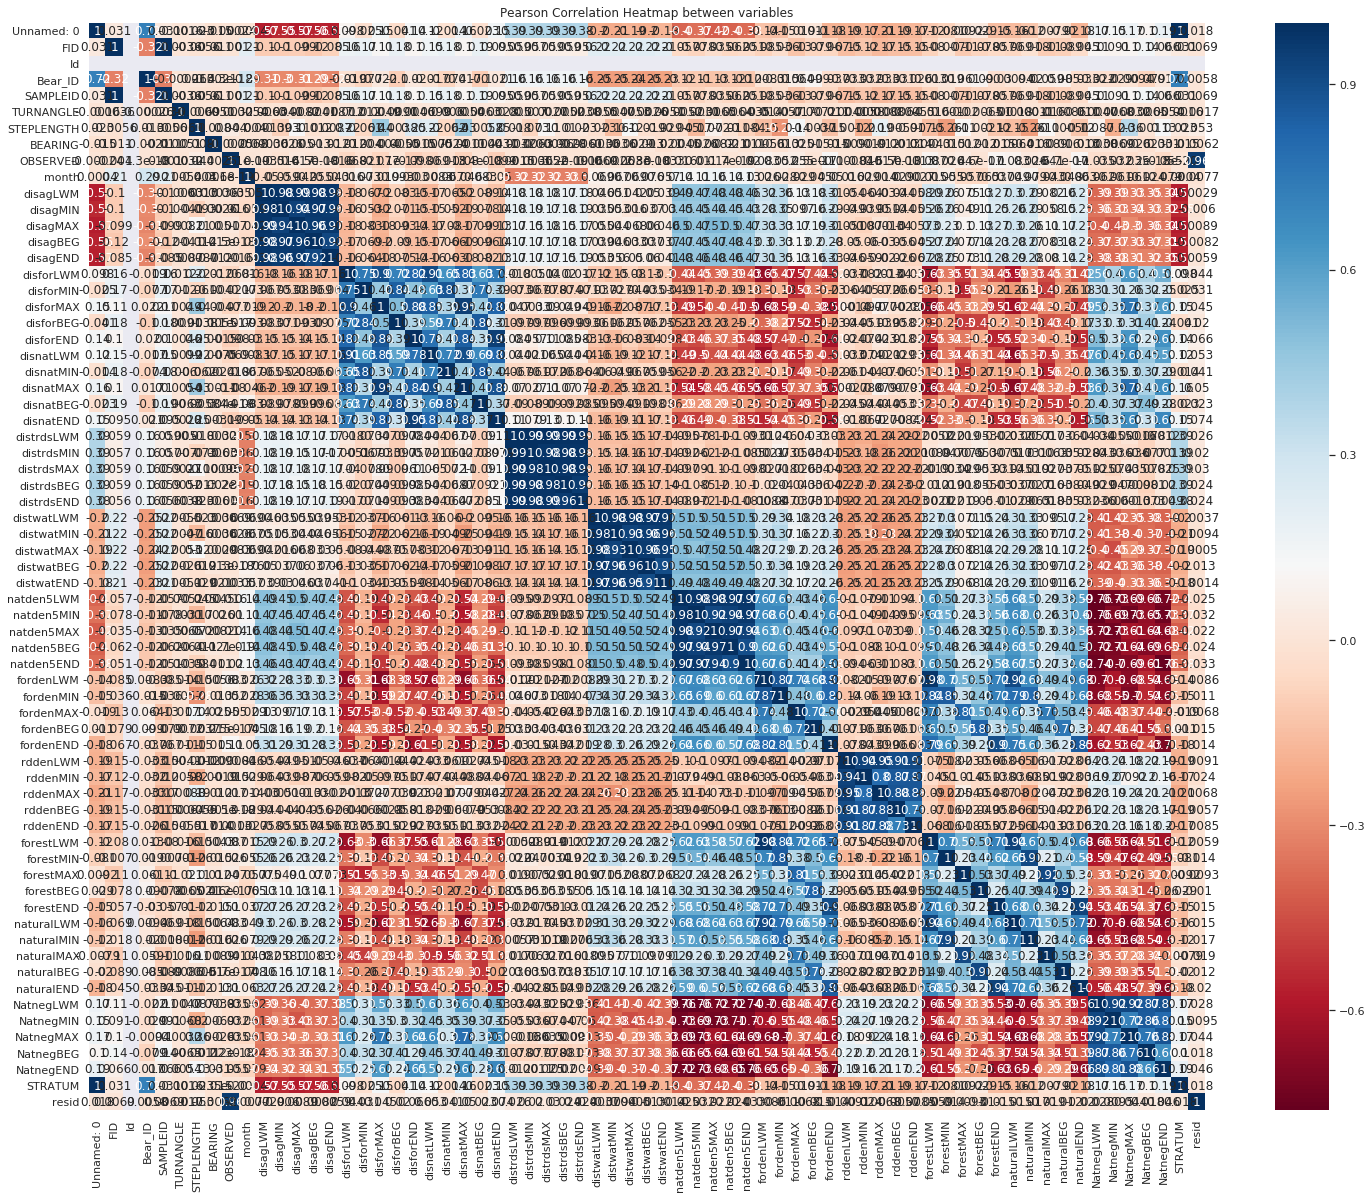

In [11]:

ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(female_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

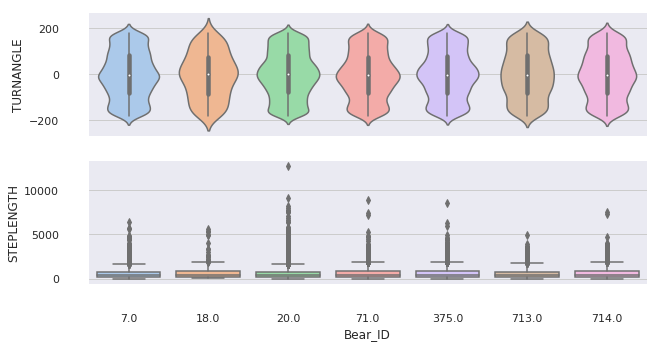

In [12]:

f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=female_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=female_clean, ax=axes[0])
sns.despine(offset=20, trim=True)

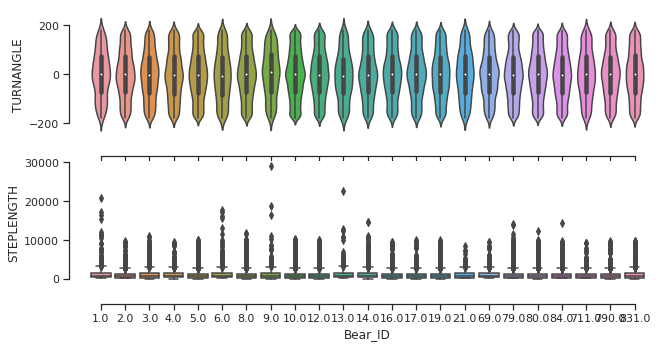

In [13]:
f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=male_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=male_clean, ax=axes[0])
sns.despine(offset=20, trim=True)

In [14]:
## Baseline Classifier

In [15]:
pip install pathos

Note: you may need to restart the kernel to use updated packages.


In [16]:

%matplotlib inline

import numpy as np
import pandas as pd
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

from pathos.multiprocessing import ProcessingPool as Pool
import multiprocessing as mp

### Goal 

Given the male and female bear dataset. Predict the response "OBSERVED" using the feature set consisting of the location and GPS coordinates data. Identify the optmized model and feature set that maximizes the accuracy and minimizes cost given the following constraints. 



In [17]:
male_clean.head()

Unnamed: 0  FID   Id  Bear_ID  SAMPLEID  TURNANGLE   STEPLENGTH  \
0         1.0  0.0  0.0      1.0       0.0 -30.452138  1517.096556   
1         2.0  1.0  0.0      1.0       1.0  86.333287   129.714618   
2         3.0  2.0  0.0      1.0       2.0  64.160478   202.879209   
3         4.0  3.0  0.0      1.0       3.0  76.329050   592.086980   
4         5.0  4.0  0.0      1.0       4.0  95.750746   488.597687   

      BEARING  OBSERVED  datetime  ...  naturalMAX naturalBEG  naturalEND  \
0  206.512289       1.0  40312.87  ...         1.0        1.0         1.0   
1  323.297713       0.0  40312.87  ...         1.0        1.0         1.0   
2  301.124905       0.0  40312.87  ...         1.0        1.0         1.0   
3  313.293477       0.0  40312.87  ...         1.0        1.0         1.0   
4  332.715173       0.0  40312.87  ...         1.0        1.0         1.0   

     NatnegLWM    NatnegMIN  NatnegMAX  NatnegBEG    NatnegEND  STRATUM  \
0  -532.332639 -1094.897217       30.0    -1050.0  -123.693169      1.0   
1 -1094.048479 -1140.394653    -1050.0    -1050.0 -1140.394653      1.0   
2 -1142.342003 -1230.365845    -1050.0    -1050.0 -1230.365845      1.0   
3 -1279.810606 -1500.299927    -1050.0    -1050.0 -1471.223999      1.0   
4 -1182.258755 -1339.290894    -1050.0    -1050.0 -1339.290894      1.0   

      resid  
0  1.618859  
1 -0.432693  
2 -0.431176  
3 -0.411518  
4 -0.413950  

[5 rows x 69 columns]

In [18]:
#male_clean['datetime'].replace('/', '-')

In [19]:
male_clean.head()

Unnamed: 0  FID   Id  Bear_ID  SAMPLEID  TURNANGLE   STEPLENGTH  \
0         1.0  0.0  0.0      1.0       0.0 -30.452138  1517.096556   
1         2.0  1.0  0.0      1.0       1.0  86.333287   129.714618   
2         3.0  2.0  0.0      1.0       2.0  64.160478   202.879209   
3         4.0  3.0  0.0      1.0       3.0  76.329050   592.086980   
4         5.0  4.0  0.0      1.0       4.0  95.750746   488.597687   

      BEARING  OBSERVED  datetime  ...  naturalMAX naturalBEG  naturalEND  \
0  206.512289       1.0  40312.87  ...         1.0        1.0         1.0   
1  323.297713       0.0  40312.87  ...         1.0        1.0         1.0   
2  301.124905       0.0  40312.87  ...         1.0        1.0         1.0   
3  313.293477       0.0  40312.87  ...         1.0        1.0         1.0   
4  332.715173       0.0  40312.87  ...         1.0        1.0         1.0   

     NatnegLWM    NatnegMIN  NatnegMAX  NatnegBEG    NatnegEND  STRATUM  \
0  -532.332639 -1094.897217       30.0    -1050.0  -123.693169      1.0   
1 -1094.048479 -1140.394653    -1050.0    -1050.0 -1140.394653      1.0   
2 -1142.342003 -1230.365845    -1050.0    -1050.0 -1230.365845      1.0   
3 -1279.810606 -1500.299927    -1050.0    -1050.0 -1471.223999      1.0   
4 -1182.258755 -1339.290894    -1050.0    -1050.0 -1339.290894      1.0   

      resid  
0  1.618859  
1 -0.432693  
2 -0.431176  
3 -0.411518  
4 -0.413950  

[5 rows x 69 columns]

In [20]:
#pd.to_timedelta(male_clean.datetime).dt.total_seconds()

In [21]:
#create a holdout set
from sklearn.model_selection import train_test_split
male_clean_x, unseen_x_test, male_clean_y, unseen_y_test = train_test_split(male_clean.loc[:, male_clean.columns != 'OBSERVED'], male_clean['OBSERVED'], test_size=0.30, stratify=male_clean['STRATUM'],random_state=42)

To begin our prediction modeling, we will create a train / test split on the X and Y variables using a 70/30 ratio between training and testing. Since we have an offbalanced Y variable, we will use stratified sampling of our OBSERVED values using STRATUM to make sure we have a significant amount of observations in each binary to best ensure our classifier is fair.

In [22]:
print(unseen_x_test.shape)
print(unseen_y_test.shape)

male_clean_x.reset_index(drop=True, inplace=True)
unseen_x_test.reset_index(drop=True, inplace=True)
male_clean_y.reset_index(drop=True, inplace=True)
unseen_y_test.reset_index(drop=True, inplace=True)

(50118, 68)
(50118,)



Now that we divided up our train and test split, we can see that our testing set has over 50,000 observations. While, as we know, the x dataframe will have 68 columns.

In [23]:
#pip install pycaret

In [24]:
#pip install parse_version

In [25]:

##TRAIN
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = male_clean_x.loc[:, male_clean_x.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = male_clean_x.loc[:, male_clean_x.dtypes == 'float64'].columns
unscaled = pd.concat([male_clean_x, male_clean_y], axis=1)

##HOLDOUT
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].columns
x = pd.DataFrame(x)
unseen_x = pd.concat([unseen_x_test, unseen_y_test], axis=1)

Now that we applied our cleaning data to our x data frame, we see that we have nearly 116k observations



In [26]:

#from pycaret.classification import *
#intialize the setup

#exp_clf = setup(unscaled
#                ,target = 'OBSERVED'
#                ,train_size = 0.7
#                ,profile = False
#                ,remove_multicollinearity = True
#                ,polynomial_features = False
#                ,feature_interaction = True
#                ,feature_ratio = False
#                ,feature_selection = True
#                #,fix_imbalance = True
#                ,silent=True
#                #,cluster = True
#                ,pca = False
#                ,numeric_imputation = 'mean'
#                ,normalize=True
#                ,categorical_features = ['datetime', 'CLUSTER']
#                #,n_jobs=32
#               )

In [27]:
# compare all baseline models and select top 5
#top5 = compare_models(n_select = 5)

In [28]:
#catboost = create_model(estimator = 'catboost', ensemble = True, method='Bagging')

In [29]:
# select best model 
#best = automl(optimize = 'MCC')

In [30]:
#plot_model(best)


## Random Forest Classifier

In [31]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
#separating input data into two parts X (features) and Y (target)

In [33]:
#SVM_SGD 10-fold cross-validation 

param_grid = { 'loss': ['modified_huber']
              ,'penalty':['l2']
              ,'alpha': [0.01, 0.1, 1, 10]
              ,'class_weight': ['balanced', None]
              ,'random_state': [101]
              ,'max_iter':[1000,1500]
              
             }

clf_SVM = SGDClassifier()
#Create a grid search object using the above parameters 
from sklearn.model_selection import GridSearchCV
SVMGridSearch = GridSearchCV(clf_SVM, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
SVMGridSearch.fit(male_clean_x,y=male_clean_y.values.ravel())
y_SVM_score = SVMGridSearch.predict(male_clean_x)

y_SVM_prob=SVMGridSearch.predict_proba(male_clean_x)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed: 32.9min finished


In [34]:
classifierEstimaterSVM =SVMGridSearch.best_estimator_
classifierEstimaterSVM

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
def EvaluateClassifierEstimator(classifierEstimator, X, Y, cv):



#Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y,
                            scoring=['accuracy', 'precision','recall'], 
                            cv=cv, return_train_score=True, 
                            )

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

SVM_scores = EvaluateClassifierEstimator(classifierEstimaterSVM,male_clean_x,male_clean_y,cv)

The average accuracy for all cv folds is: 			 0.54428
The average precision for all cv folds is: 			 0.184
The average Recall for all cv folds is: 			 0.50648
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.907730   0.443396  0.044049
1  0.880195   0.189591  0.095595
2  0.097742   0.091848  0.999064
3  0.122114   0.093656  0.992509
4  0.147426   0.095290  0.981273
5  0.870617   0.171344  0.108614
6  0.902685   0.253521  0.033708
7  0.378485   0.109965  0.818352
8  0.231914   0.102471  0.955056
9  0.903874   0.288889  0.036551


In [36]:
from sklearn.metrics import roc_curve, auc
fprSVM = dict()
tprSVM = dict()
roc_auc_SVM = dict()
for i in np.unique(male_clean_y):
    fprSVM[i], tprSVM[i], _ = mt.roc_curve(male_clean_y, y_SVM_prob[:,i], pos_label=i)
    roc_auc_SVM[i] = mt.auc(fprSVM[i], tprSVM[i])
plt.figure(figsize=(12,8));    
for i in np.unique(male_clean_y):
    plt.plot(fprSVM[i], tprSVM[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_SVM[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for SVM classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [37]:
def EvaluateClassifierEstimator2(classifierEstimator, X, Y2, cv):
    
  #Perform cross validation 
  from sklearn.model_selection import cross_val_predict
  predictions = cross_val_predict(classifierEstimator, 
                                  X, Y2, cv=cv)
    
#model evaluation 
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#pass true test set values and predictions to classification_report
  classReport = classification_report(Y2,predictions)
  confMat = confusion_matrix(Y2,predictions)
  acc = accuracy_score(Y2,predictions)
    
  print(classReport)
  print(confMat)
  print(acc)

In [38]:
EvaluateClassifierEstimator2(classifierEstimaterSVM, male_clean_x, male_clean_y, cv)


              precision    recall  f1-score   support

         0.0       0.92      0.55      0.69    106262
         1.0       0.10      0.51      0.17     10677

    accuracy                           0.54    116939
   macro avg       0.51      0.53      0.43    116939
weighted avg       0.84      0.54      0.64    116939

[[58238 48024]
 [ 5268  5409]]
0.5442752204140621


#### Model 2: KNN with Grid Search

In [39]:
param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[13,15,17],
         
    }
]
clf_KNN = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(clf_KNN, param_grid=param_grid,cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

KNearest_model = grid_search_KNN.fit(male_clean_x, male_clean_y.values.ravel())
y_KNN_score = grid_search_KNN.predict(male_clean_x)

y_KNN_prob=grid_search_KNN.predict_proba(male_clean_x)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed: 18.3min finished


In [40]:
classifierEstimaterKNN = KNearest_model.best_estimator_
classifierEstimaterKNN

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')

In [41]:
KNearest_scores = EvaluateClassifierEstimator(classifierEstimaterKNN,male_clean_x, male_clean_y,cv=cv)


The average accuracy for all cv folds is: 			 0.90887
The average precision for all cv folds is: 			 0.53778
The average Recall for all cv folds is: 			 0.013112
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.908757   0.500000  0.014995
1  0.909270   0.636364  0.013121
2  0.908244   0.380952  0.007491
3  0.909099   0.586207  0.015918
4  0.909526   0.647059  0.020599
5  0.908671   0.500000  0.009363
6  0.909441   0.714286  0.014045
7  0.908244   0.407407  0.010300
8  0.909013   0.576923  0.014045
9  0.908407   0.428571  0.011246


In [42]:
EvaluateClassifierEstimator2(classifierEstimaterKNN, male_clean_x, male_clean_y,cv=cv)


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    106262
         1.0       0.54      0.01      0.03     10677

    accuracy                           0.91    116939
   macro avg       0.72      0.51      0.49    116939
weighted avg       0.88      0.91      0.87    116939

[[106142    120]
 [ 10537    140]]
0.9088670161366182


In [43]:
fprKNN = dict()
tprKNN = dict()
roc_auc_KNN = dict()
for i in np.unique(male_clean_y):
    fprKNN[i], tprKNN[i], _ = mt.roc_curve(male_clean_y, y_KNN_prob[:, i], pos_label=i)
    roc_auc_KNN[i] = mt.auc(fprKNN[i], tprKNN[i])
plt.figure(figsize=(12,8));    
for i in np.unique(male_clean_y):
    plt.plot(fprKNN[i], tprKNN[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_KNN[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for KNN classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Model 3: Random Forest

In [44]:

param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [5,10,15],
         'random_state':[101]
     }
]

clf_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

RandomForest_model = grid_search_RF.fit(male_clean_x, male_clean_y.values.ravel())

y_RF_score = grid_search_RF.predict(male_clean_x)
y_RF_prob=grid_search_RF.predict_proba(male_clean_x)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 37.2min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed: 67.6min finished


In [45]:

classifierEstimaterRF = RandomForest_model.best_estimator_
classifierEstimaterRF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [46]:
Random_Forest_scores = EvaluateClassifierEstimator(classifierEstimaterRF,male_clean_x, male_clean_y,cv=cv)


The average accuracy for all cv folds is: 			 0.98709
The average precision for all cv folds is: 			 1.0
The average Recall for all cv folds is: 			 0.85859
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.991021        1.0  0.901593
1  0.992817        1.0  0.921275
2  0.989567        1.0  0.885768
3  0.963828        1.0  0.603933
4  0.994869        1.0  0.943820
5  0.987173        1.0  0.859551
6  0.996836        1.0  0.965356
7  0.971096        1.0  0.683521
8  0.991278        1.0  0.904494
9  0.992389        1.0  0.916589


In [47]:
EvaluateClassifierEstimator2(classifierEstimaterRF,male_clean_x, male_clean_y,cv=cv)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    106262
         1.0       1.00      0.86      0.92     10677

    accuracy                           0.99    116939
   macro avg       0.99      0.93      0.96    116939
weighted avg       0.99      0.99      0.99    116939

[[106262      0]
 [  1510   9167]]
0.9870872848237116


### XG Boost Classifier

In [49]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/f6/5c/1133b5b8f4f2fa740ff27abdd35b8e79ce6e1f8d6480a07e9bce1cdafea2/xgboost-1.2.0-py3-none-manylinux2010_x86_64.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/hpc/applications/anaconda/3/lib/python3.6/site-packages/xgboost'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [48]:

__author__ = 'Tilii: https://kaggle.com/tilii7' 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(male_clean_x, male_clean_y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
XGB_ = random_search.fit(male_clean_x, male_clean_y.values.ravel())
timer(start_time) # timing ends here for "start_time" variable